In [ ]:
import pandas as pd
import pymysql
import mysql.connector

#####key_dict2021 wordcloud####
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from PIL import Image

## 워드클라우드를 위한 빈도수 딕셔너리

In [2]:
key_dict2021 = {}
gen_dict2021 = {}
con_dict2021 = {}
key_dict2020 = {}
gen_dict2020 = {}
con_dict2020 = {}

In [3]:

Maria_db = pymysql.connect(
    user='root', 
    passwd='', 
    host='', 
    db='project', 
    charset='utf8'
)
cursor = Maria_db.cursor(pymysql.cursors.DictCursor)

#######2021 keyword 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######
cursor.execute(" select keyword, count(keyword) from score_table left join detail_table on score_table.title = detail_table.title where year = 2021 group by keyword;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    key_dict2021[df.iloc[i,0]] = df.iloc[i,1]

#######2021 genre 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######
cursor.execute("select genre, count(genre) from score_table left join detail_table on score_table.title = detail_table.title where year = 2021 group by genre;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    gen_dict2021[df.iloc[i,0]] = df.iloc[i,1]    
    
#######2021 nation 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######    
cursor.execute("select nation, count(nation) from score_table left join detail_table on score_table.title = detail_table.title where year = 2021 group by nation;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    con_dict2021[df.iloc[i,0]] = df.iloc[i,1]    
    
#######2020 keyword 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######
cursor.execute("select keyword, count(keyword) from score_table left join detail_table on score_table.title = detail_table.title where year = 2020 group by keyword;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    key_dict2020[df.iloc[i,0]] = df.iloc[i,1]
    
#######2020 genre 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######
cursor.execute("select genre, count(genre) from score_table left join detail_table on score_table.title = detail_table.title where year = 2020 group by genre;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    gen_dict2020[df.iloc[i,0]] = df.iloc[i,1]
    
#######2020 nation 워드클라우드를 위한 빈도수 딕셔너리 만들기 ######
cursor.execute("select nation, count(nation) from score_table left join detail_table on score_table.title = detail_table.title where year = 2020 group by nation;")
table_rows = cursor.fetchall()
df = pd.DataFrame(table_rows)
for i in range(len(df)):
    con_dict2020[df.iloc[i,0]] = df.iloc[i,1]

Maria_db.commit()
Maria_db.close()



## 워드클라우드

In [71]:
###### 컬러맵 리스트 ######
color_m = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

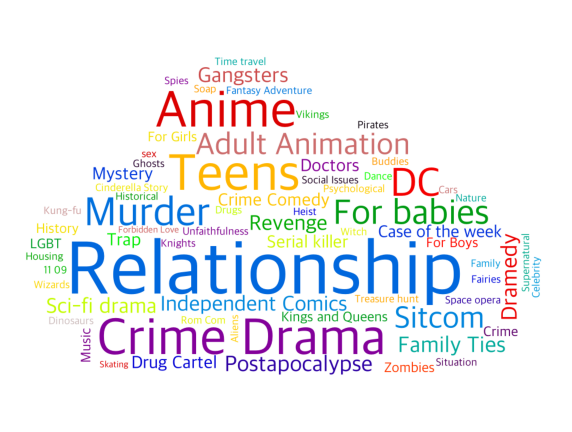

In [32]:
#####key_dict2021 wordcloud####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color='white',
               colormap='nipy_spectral',
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(key_dict2021)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_key_2021.png",dpi=150)
plt.show()

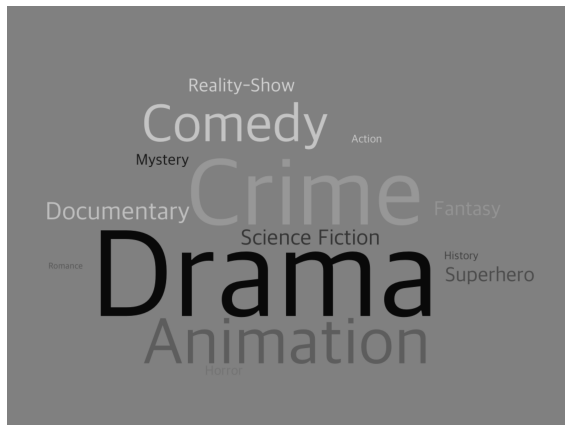

In [49]:
##### gen_dict2021 wordcloud ####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color='grey',
               colormap='binary',
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(gen_dict2021)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_gen_2021.png",dpi=150)
plt.show()

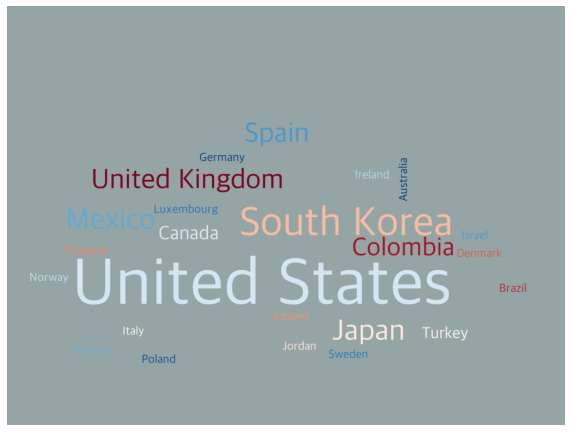

In [67]:
##### con_dict2021 wordcloud ####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color="#95a5a6",
               colormap='RdBu',
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(con_dict2021)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_con_2021.png",dpi=150)
plt.show()

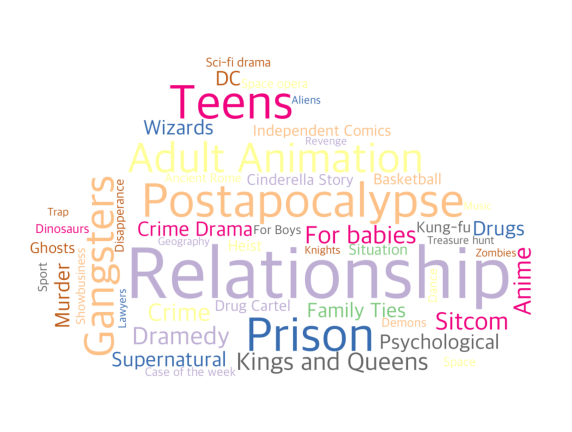

In [72]:
##### key_dict2020 wordcloud ####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color='white',
               colormap=color_m[0],
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(key_dict2020)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_key_2020.png",dpi=150)
plt.show()

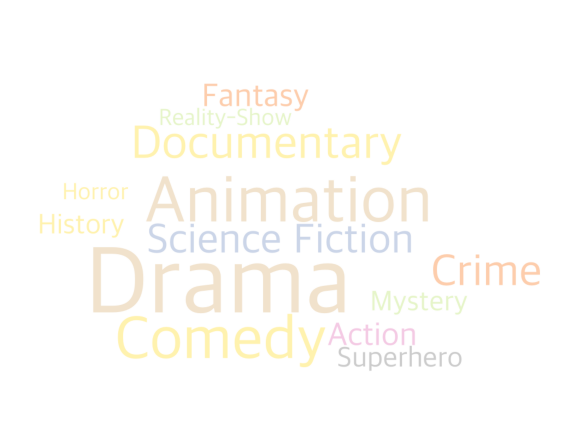

In [75]:
##### gen_dict2020 wordcloud ####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color='white',
               colormap=color_m[30],
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(gen_dict2020)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_gen_2020.png",dpi=150)
plt.show()

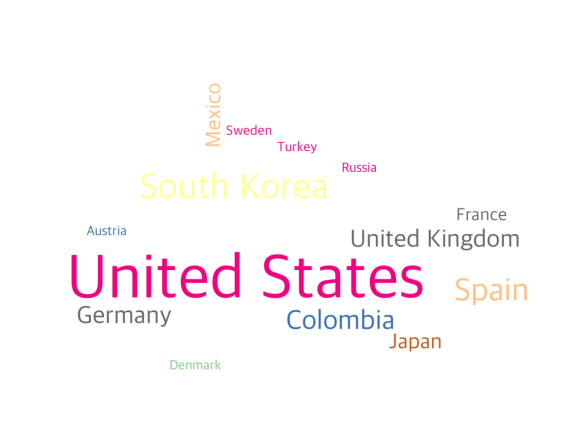

In [76]:
##### con_dict2020 wordcloud ####
plt.figure(figsize=(10,10))
icon = Image.open('./image.png')
#plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)
font_path = "AppleSDGothicNeo.ttc"
wc = WordCloud(font_path,
               background_color='white',
               colormap='Accent_r',
               width=800, 
               height=600 ,                                
               max_words=200,                                     
               mask=mask)                                                     

wordcloud_image = wc.generate_from_frequencies(con_dict2020)                           
plt.imshow(wordcloud_image)
                                       
plt.axis("off")
plt.savefig("wc_con_2020.png",dpi=150)
plt.show()